In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
from singleScattering import scattering
import refractiveIndex


In [2]:
# One centimeter particle, S-band 2.8GHz, pure ice sphere 
f=2.8e9

n = refractiveIndex.n(frequencies=f,temperatures=263.15,substance='ice')
rayC = scattering(diameters=0.01, frequencies=f, refractive_indices=n,model='Ray')
mieC = scattering(diameters=0.01, frequencies=f, refractive_indices=n,model='Mie')

print('Cext                    Cabs                    Csca                   Cbck            [m**2]')
print(rayC)
print(mieC)

Cext                    Cabs                    Csca                   Cbck            [m**2]
(8.277649057241085e-07, 8.24616639111006e-07, 3.148266613102465e-09, 4.12308319555503e-07)
(2.8454380806670737e-07, 2.8116178876160294e-07, 3.3820193051044683e-09, 4.0286776142980933e-07)


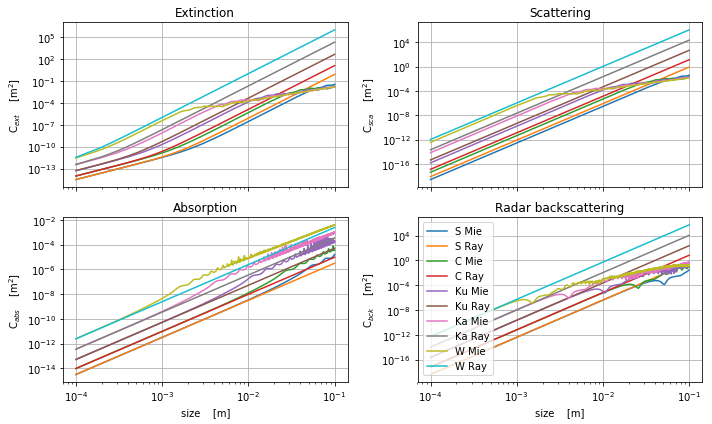

In [3]:
import numpy as np
fig, ((ax00,ax01),(ax10,ax11)) = plt.subplots(2,2,figsize=(10,6),sharex=True)

sizes = np.linspace(0.0001,0.1,1000) # from 0.1 mm to 10 cm
extMie = 0.0*sizes
scaRay = 0.0*sizes
absRay = 0.0*sizes
bckRay = 0.0*sizes
extRay = 0.0*sizes
scaMie = 0.0*sizes
absMie = 0.0*sizes
bckMie = 0.0*sizes
extMie = 0.0*sizes
frequencies = {'S':2.8e9,'C':5.6e9,'Ku':13.6e9,'Ka':35.6e9,'W':94e9}
for fk in frequencies.keys():
    f = frequencies[fk]
    n = refractiveIndex.n(frequencies=f,temperatures=263.15,substance='ice')
    
    for i,s in enumerate(sizes):
        rayC = scattering(diameters=s, frequencies=f, refractive_indices=n,model='Ray')
        mieC = scattering(diameters=s, frequencies=f, refractive_indices=n,model='Mie')
        #print(s,i)
        extMie[i] = mieC[0]
        scaMie[i] = mieC[1]
        absMie[i] = mieC[2]
        bckMie[i] = mieC[3]
        extRay[i] = rayC[0]
        scaRay[i] = rayC[1]
        absRay[i] = rayC[2]
        bckRay[i] = rayC[3]
    ax00.plot(sizes,extMie,label=fk+' Mie')
    ax01.plot(sizes,scaMie,label=fk+' Mie')
    ax10.plot(sizes,absMie,label=fk+' Mie')
    ax11.plot(sizes,bckMie,label=fk+' Mie')
    ax00.plot(sizes,extRay,label=fk+' Ray')
    ax01.plot(sizes,scaRay,label=fk+' Ray')
    ax10.plot(sizes,absRay,label=fk+' Ray')
    ax11.plot(sizes,bckRay,label=fk+' Ray')

ax00.set_yscale('log')
ax01.set_yscale('log')
ax10.set_yscale('log')
ax11.set_yscale('log')
ax00.set_xscale('log')
ax01.set_xscale('log')
ax10.set_xscale('log')
ax11.set_xscale('log')
ax11.legend()
ax00.grid()
ax01.grid()
ax10.grid()
ax11.grid()
ax00.set_ylabel('C$_{ext}$    [m$^2$]')
ax01.set_ylabel('C$_{sca}$    [m$^2$]')
ax10.set_ylabel('C$_{abs}$    [m$^2$]')
ax11.set_ylabel('C$_{bck}$    [m$^2$]')
ax10.set_xlabel('size    [m]')
ax11.set_xlabel('size    [m]')
ax00.set_title('Extinction')
ax01.set_title('Scattering')
ax10.set_title('Absorption')
ax11.set_title('Radar backscattering')
fig.tight_layout()

In [4]:
mieC

(0.01652173508011372,
 0.012546995334861762,
 0.003974739745251957,
 0.18006404257190578)

In [5]:
mieC[0]

0.01652173508011372

#### Old code to test inner functionalities

In [6]:
import numpy as np


import sys
sys.path.append('../') # singleScattering is not in my default path

from singleScattering import scatterer
from singleScattering import Rayleigh

%matplotlib inline

In [7]:
try:
    generic = scatterer.scatterer()
except:
    pass
try:
    ray = Rayleigh.Rayleigh()
except:
    pass
try:
    TM = scatterer.T_Matrix()
except:
    pass
try:
    Mie = scatterer.Mie()
except:
    pass
#ray.back_spec

In [8]:
ray = Rayleigh.RayleighScatt(frequency=1.0e9,dielectric_permittivity=complex(6.0,1.0))
# ray.set_scattering_geometry([0.5*np.pi, 0.0, 0.5*np.pi, 0.0])
# ray.set_scattering_geometry([0.0, 0.0, np.pi, 0.0])
# ray.set_scattering_geometry([np.pi, 0.0, np.pi, 0.0])

In [9]:
ray.set_scattering_geometry([0.5*np.pi, 0.0, 0.5*np.pi, np.pi, 0.5*np.pi, np.pi])



In [10]:
print(ray.wavelength,ray.Cbck)

0.299792458 1.5153974184979275e-14


In [11]:
8.0*ray.size_parameter**4*ray.K2*ray.geometric_cross_section/3.0

1.0102649456652851e-14

In [12]:
ray.Cabs

1.5194518440060331e-09

In [13]:
print(ray.theta_inc,ray.theta_sca,ray.phi_inc,ray.phi_sca)
ray.scatt_angle


1.5707963267948966 0.0 1.5707963267948966 3.141592653589793


1.5707963267948966